# Gibbs phenomenon

**Presenter**: Thanh Hung Duong

In [47]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
# Generate animation
from matplotlib import animation, rc
from IPython.display import HTML
# Set up size and font size for figure, format of animation
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 18})
plt.rcParams['animation.html'] = 'jshtml'
# Remove all future warnings
import warnings
warnings.filterwarnings("ignore")

## Set up input: dx, L, x, nquart

In [48]:
dx = 0.01 # increment
L = 2*np.pi #range 0 →2Pi=6.28
x = np.arange(0,L+dx,dx) # x
n = len(x) # number of points
nquart = int(np.floor(n/4)) # jumping point
print("Number of points: ", n)
print("Jumping point: ", nquart)

Number of points:  630
Jumping point:  157


## Set up function f

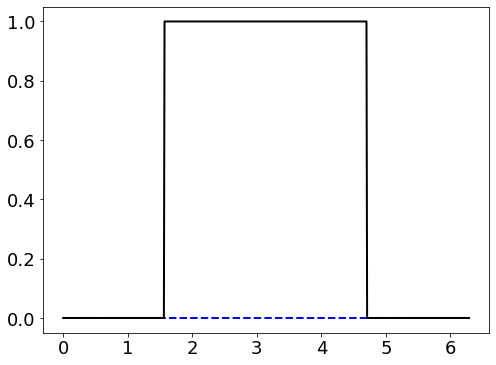

In [49]:
f = np.zeros_like(x)
plt.plot(x,f,color='blue',LineStyle = '--',LineWidth=2)
f[nquart:3*nquart] = 1
plt.plot(x,f,color='k',LineWidth=2)
plt.show()

## Compute Fourier series

In [50]:
## Compute A0 and fFS(0)
A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

# Store all fFS

k_max = 512
all_fFS = np.zeros((len(fFS),k_max+1))
all_fFS[:,0] = fFS

# Compute Ak, Bk, and fFS(k) for k >0
for k in range(1,k_max+1):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
    all_fFS[:,k] = fFS

the peculiar manner in which the Fourier series of a piecewise continuously differentiable periodic function behaves at a jump discontinuity

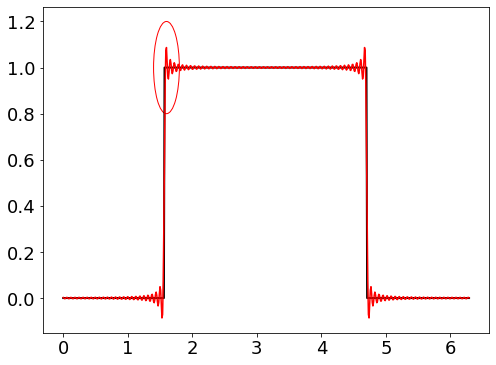

In [57]:
# Visualization
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
plt.plot(x,f,color='k',LineWidth=2)
plt.plot(x,all_fFS[:,100],'-',color='r',LineWidth=1.5)
c1 = plt.Circle((1.6, 1), 0.2, color='r', fill=False)
ax.add_patch(c1)
plt.show()

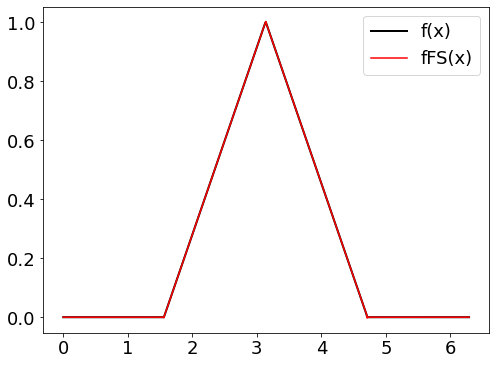

In [52]:
# Define hat function
fc = np.zeros_like(x)
fc[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
fc[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)
A0 = np.sum(fc * np.ones_like(x)) * dx * 2 / L
fcFS = A0/2 * np.ones_like(f)

for k in range(1,k_max):
    Ak = np.sum(fc * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(fc * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fcFS = fcFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)
plt.plot(x,fc,color='k',LineWidth=2, label="f(x)")
plt.plot(x,fcFS,'-',color='r',LineWidth=1.5, label="fFS(x)")
plt.legend()
plt.show()

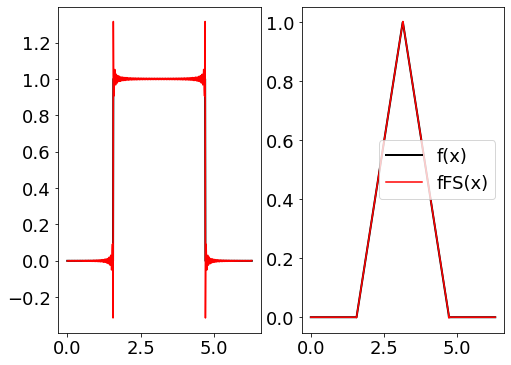

In [53]:
plt.subplot(1,2,1)
plt.plot(x,f,color='k',LineWidth=2, label="f(x)")
plt.plot(x,fFS,'-',color='r',LineWidth=1.5, label="fFS(x)")
plt.subplot(1,2,2)
plt.plot(x,fc,color='k',LineWidth=2, label="f(x)")
plt.plot(x,fcFS,'-',color='r',LineWidth=1.5, label="fFS(x)")
plt.legend()
plt.show()

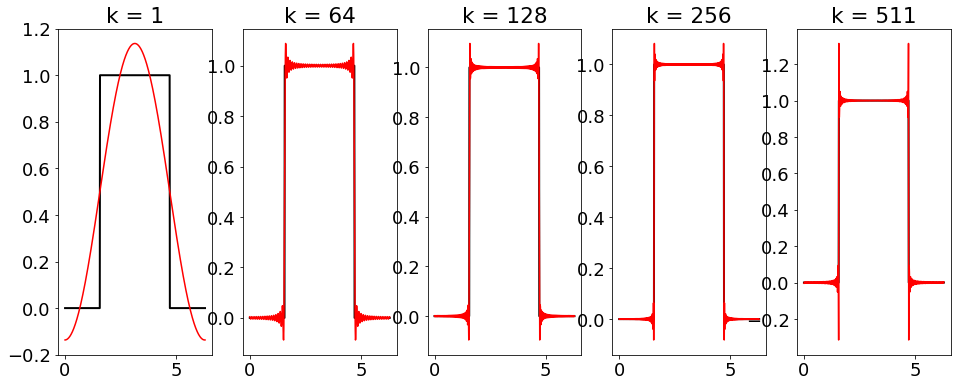

In [54]:
plt.figure(figsize=(16,6))
for i, value in enumerate([1,k_max//8,k_max//4,k_max//2,k_max-1]):
    plt.subplot(1,5,i+1)
    plt.plot(x,f,color='k',LineWidth=2)
    plt.plot(x,all_fFS[:,value],'-',color='r',LineWidth=1.5)
    plt.title('k = '+ str(value))
plt.show()

## Create animation

In [55]:
def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-0.2, 1.2)
    return fFS

def animate(iter):
    fFS_plot.set_data(x,all_fFS[:,iter])
    ax.set_title('k = '+str(iter))
    return fFS_plot

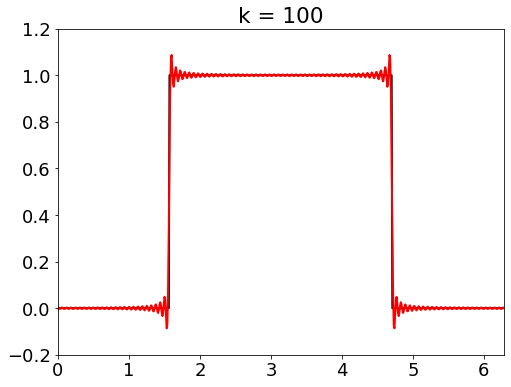

In [56]:
fig,ax = plt.subplots()
plt.plot(x,f,color='k',LineWidth=2)
fFS_plot, = plt.plot([],[],color='r',LineWidth=2)
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=101,interval=50,blit=False,repeat=False)
HTML(anim.to_jshtml())

Generate the slides and serve them using nbconvert:

jupyter nbconvert --to slides your_talk.ipynb --post serve

It opens up a webpage in the browser at http://127.0.0.1:8000/your_talk.slides.html#/

Add ?print-pdf to the query string as http://127.0.0.1:8000/your_talk.slides.html?print-pdf

Note that you need to remove the # at the end. The page will render the slides vertically.

Save to PDF in Chrome using the print option